<a href="https://colab.research.google.com/github/vavvari/MAT421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 Lagrange Polynomial Interpolation**

Instead of finding multiple cubic polynomials between pairs of data points, with Lagrange interpolation we find a single polynomial which goes through each of our data points. Here we will find the Lagrange basis polynomials for the data set x = [0,2,4] and y = [1,3,2]. Our polynomials are P1=(1/8)(x^2-6x+8), P2=(-1/4)(x^2-4x), P3=(1/8)(x^2-2x). The Lagrange polynomial is a linear combination of basis polynomials.

<ipython-input-3-3e195e40d1f9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


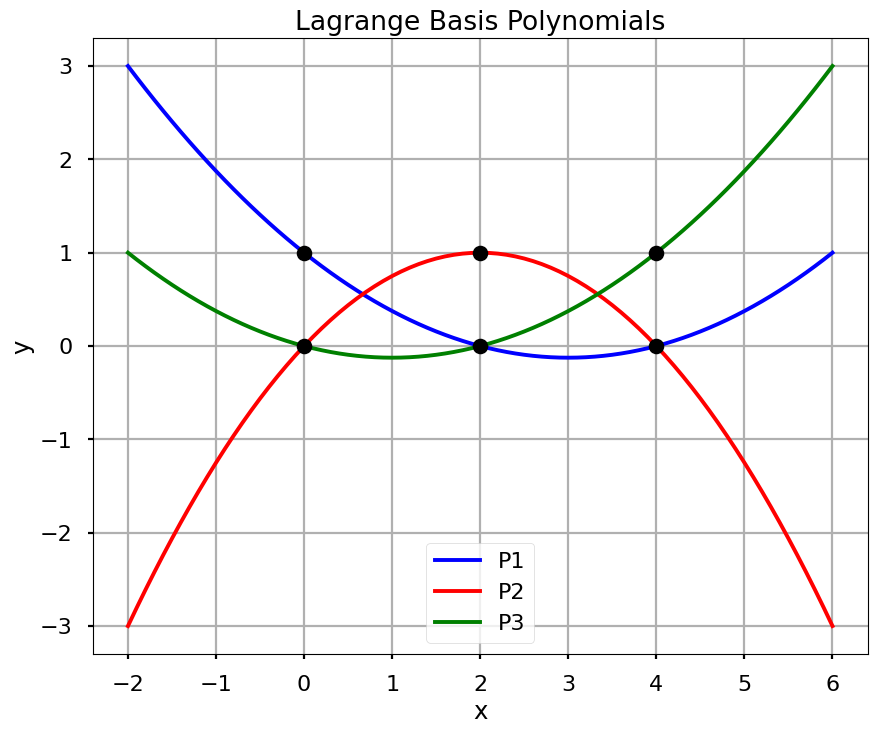

In [3]:
# imports for polynomial functions and plot style
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0, 2, 4]
y = [1, 3, 2]
P1_coeff = [1,-.75,.125]
P2_coeff = [0, 1,-.25]
P3_coeff = [0,-.25,.125]
# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
x_new = np.arange(-2.0, 6.1, 0.1)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


We can then compute and plot the Lagrange polynomial and check that it goes through each data point.

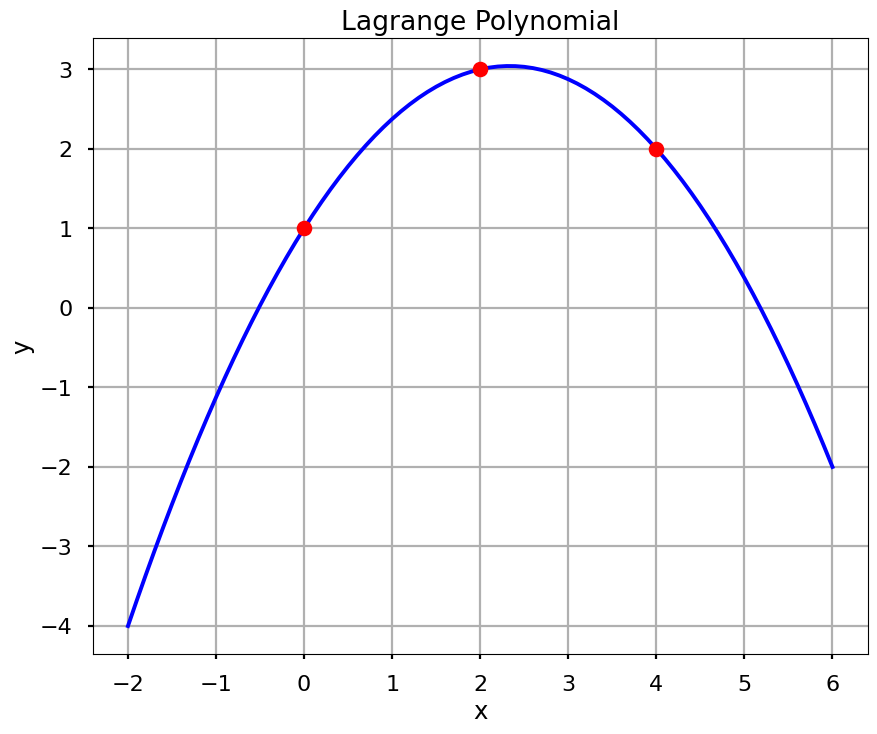

In [4]:
# L corresponding to set of y data

L = P1 + 3*P2 + 2*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**17.5 Newton's Polynomial Interpolation**

When we want to exactly fit for a set of data points we can use Newton's Interpolation. A specialty of Newton's Polynomial Interpolation is that the coefficients can be easily determined. To do this, we construct a divided differences table. Here we have the data sets x = [-7,-1,0,3] and y = [-1,4,1,2] and will calculate divided differences.

<ipython-input-6-85d8d8f5a759>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


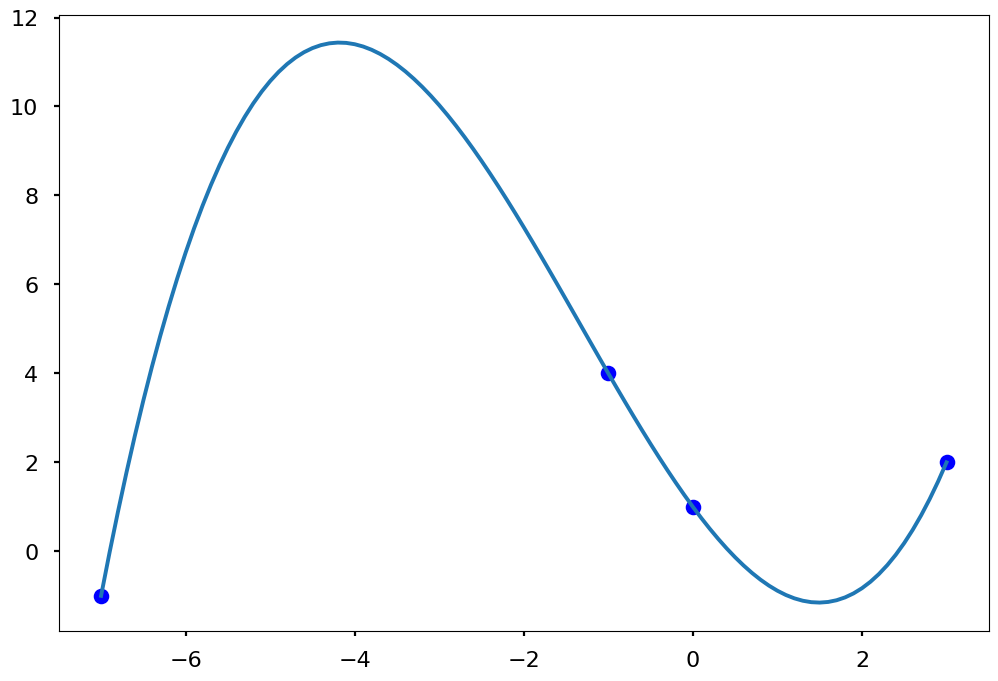

In [6]:
# imports for plot style
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# making function for divided differences table
def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
  (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

# function to find the Newton polynomial at x
def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([-7, -1, 0, 3])
y = np.array([-1, 4, 1, 2])

# finds coefficient of divided differences
a_s = divided_diff(x, y)[0, :]

# used on new data points
x_new = np.arange(-7, 3.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

Thus, the Newton Polynomial goes through each data point and can be seen to fit the data.